## Final Project Submission

Please fill out:
* Group 1 DSC_PT08P2_Project
* Student name: Gilbert Kipkirui Cheruiyot
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Samuel Karu & Daniel Ekale
* Blog post URL:

In [100]:
# Import necessary libraries
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
import zipfile
import os

### Reading Data

In [101]:
#Unzip the zipped database file!

#Path to your zip file
zip_path = './Data/dsc-phase-2-project-v3-main.zip'

#Extract to a specific directory (optional)
extract_path = './unzipped'

#Create the directory if it doesn't exist
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

#Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping complete. Database file extracted to:", extract_path)

Unzipping complete. Database file extracted to: ./unzipped


In [102]:
#Unzip imdb zipped database file!

#Path to your zip file
zip_path = './unzipped/dsc-phase-2-project-v3-main/zippedData/im.db.zip'

#Extract to a specific directory (optional)
extract_path = './imdb'

#Create the directory if it doesn't exist
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

#Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping complete. Database file extracted to:", extract_path)

Unzipping complete. Database file extracted to: ./imdb


In [103]:
df_1 = pd.read_csv('unzipped/dsc-phase-2-project-v3-main/zippedData/tn.movie_budgets.csv.gz')
df_1.head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [104]:
# Read movie_gross file and check the first five rows
movie_gross = pd.read_csv("unzipped/dsc-phase-2-project-v3-main/zippedData/bom.movie_gross.csv.gz")
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [105]:
# Read movie_budget file and check the first five rows
movie_budget = pd.read_csv("unzipped/dsc-phase-2-project-v3-main/zippedData/tn.movie_budgets.csv.gz")
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [106]:
# Read reviews file and check the first five rows
reviews = pd.read_csv("unzipped/dsc-phase-2-project-v3-main/zippedData/rt.reviews.tsv.gz", sep='\t', encoding='ISO-8859-1')
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [107]:
# Read movie_info file and check the first five rows
movie_info = pd.read_csv("unzipped/dsc-phase-2-project-v3-main/zippedData/rt.movie_info.tsv.gz", sep='\t', encoding='ISO-8859-1')
movie_info.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [108]:
# Read im.db 
conn = sqlite3.connect("im.db")
Query=("""SELECT *
       FROM sqlite_master
       WHERE type='table'
            ;""")
#pd.read_sql("""SELECT name FROM sqlite_master WHERE type='table';""", conn)

df=pd.read_sql(Query,conn)
df

,type,name,tbl_name,rootpage,sql


In [109]:
cur = conn.cursor()

pd.read_sql("""SELECT name FROM sqlite_master WHERE type='table';""", conn)

,name


### Data Cleaning

#### Data information of movie_info dataset

In [110]:
# Check the statistics of the movie_info file to know the spread and the distribution of the data
movie_info.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


##### Statistical information:
* ID column in Movie_info has 1560 unique values counted. 
* The mean of the unique data in movie_info was 1007.30.
* The standard deviation of the ID column in movie_info was 579.16. This shows how data deviates from the mean.
* The minimum value of ID is 1 with the maximum being 2000

In [111]:
# Get the dimensions of the DataFrame movie_info
movie_info.shape

(1560, 12)

##### movie_info shape 
* Movie_info has 1560 rows and 12 columns

In [112]:
# Get a summary of information about the movie_info data
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


##### Summary of the information in movie_info
* All the ID details are 1560 with none missing and is of an integer type
* Movie_info has 11 columns with text type of data. The 11 columns also have missing values

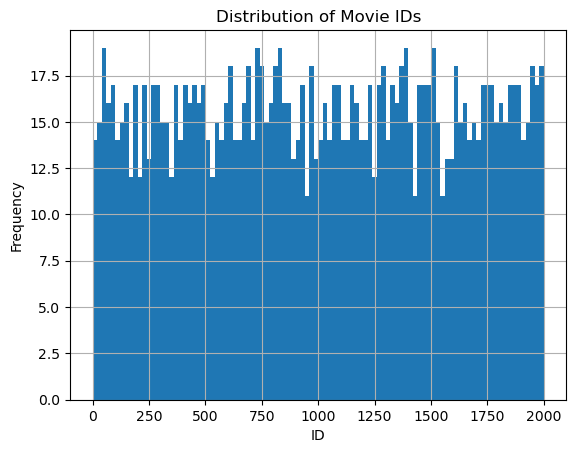

In [113]:
# Visualise the distribution of the movie_info ID

movie_info['id'].hist(bins=100)

# include titles
plt.title('Distribution of Movie IDs')
plt.xlabel('ID')
plt.ylabel('Frequency')

# show the histogram
plt.show()


##### Check Missing Values in Movie Info Dataset

In [114]:
# Get a summary of information about the missing values in movie_info data

# Get missing values count and percentage

missing_values = movie_info.isnull().sum()

missing_percentage = (movie_info.isnull().sum() / len(movie_info)) * 100

# Create a summary dataframe

missing_summary_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage})

# Sort by percentage missing
missing_summary = missing_summary_df.sort_values('Percentage Missing', ascending=False);

missing_summary


,Missing Values,Percentage Missing
currency,1220,78.205128
box_office,1220,78.205128
studio,1066,68.333333
writer,449,28.782051
theater_date,359,23.012821
dvd_date,359,23.012821
director,199,12.756410
synopsis,62,3.974359
runtime,30,1.923077
genre,8,0.512821


##### Information about the missing values
* Studio, box_office and currency columns have the highest number of missing values, all above 50% of the values.

#### Cleaning the Movie_info dataset

In [115]:
# Drop columns with more than 50% missing values for the movie_info dataset

cols_to_drop = missing_summary[missing_summary['Percentage Missing'] > 50].index

# Drop these columns
df_cleaned = movie_info.drop(columns=cols_to_drop)

#Fill categorical columns with mode
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# Check if there are any remaining missing values
remaining_missing = df_cleaned.isnull().sum().sum()

# check if there are remaining columns with missing values
print("\
Remaining Missing Values:", remaining_missing)

df_cleaned.isna().sum()

Remaining Missing Values: 0


C:\Users\HP\AppData\Local\Temp\ipykernel_7172\4185709950.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)


id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
runtime         0
dtype: int64

In [116]:
#Check the first five rows of the cleaned dataset for the movie_info 
df_cleaned.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
4,7,A group of air crash survivors are stranded in...,NR,Drama|Romance,Rodney Bennett,Giles Cooper,"Jan 1, 1987","Jun 1, 2004",200 minutes


#### Get more precise movie genres

In [117]:
# split the genre column into a list of genres
df_cleaned['genre_list'] = df_cleaned['genre'].str.split('|')

# Explode to create a new row for each genre
df_cleaned_exploded = df_cleaned.explode('genre_list')

# Display the first few rows
df_cleaned_exploded.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,genre_list
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action and Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Classics
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Science Fiction and Fantasy


In [118]:
# Remove the genre_column
df_cleaned_exploded = df_cleaned_exploded.drop('genre', axis=1)

In [119]:
# Rename the genre_list column to genre
updated_df = df_cleaned_exploded.rename(columns={'genre_list': 'genre'})

updated_df.head()

,id,synopsis,rating,director,writer,theater_date,dvd_date,runtime,genre
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action and Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Classics
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Science Fiction and Fantasy


In [120]:
# Extract numeric values from the 'runtime' column
updated_df['runtime'] = updated_df['runtime'].str.extract('(\d+)').astype(float)

updated_df.head()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_7172\751755570.py:2: SyntaxWarning: invalid escape sequence '\d'
  updated_df['runtime'] = updated_df['runtime'].str.extract('(\d+)').astype(float)


,id,synopsis,rating,director,writer,theater_date,dvd_date,runtime,genre
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,Action and Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,Classics
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,Science Fiction and Fantasy


In [121]:
#Convert the dates to Date Time format
updated_df['theater_date'] = pd.to_datetime(df_cleaned_exploded['theater_date'])

updated_df['dvd_date'] = pd.to_datetime(df_cleaned_exploded['dvd_date'])

#### Checking the cleaned DataFrame Data Types

In [122]:
# Get a summary of information about the movie_info cleaned dataset
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3581 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            3581 non-null   int64         
 1   synopsis      3581 non-null   object        
 2   rating        3581 non-null   object        
 3   director      3581 non-null   object        
 4   writer        3581 non-null   object        
 5   theater_date  3581 non-null   datetime64[ns]
 6   dvd_date      3581 non-null   datetime64[ns]
 7   runtime       3581 non-null   float64       
 8   genre         3581 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 279.8+ KB


##### Movie_info cleaned dataset information
* The dataset has 3581 rows and 9 columns.
* All the rows have no missing values.
* ID column has integers while runtime is made of datetime data type. The rest of the columns have text type of data.

##### The movie_info Dataset is now clean and ready for exploratory data analysis (EDA)

#### Data information of movie_budget dataset

In [123]:
# Check the statistics of the movie_budget file to know the spread and the distribution of the data
movie_budget.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


##### Statistical information:
* ID column in Movie_budget has 5782 unique values counted. 
* The mean of the unique data in movie_budget was 50.37.
* The standard deviation of the ID column in movie_budget was 28.82. This shows how data deviates from the mean.
* The minimum value of ID is 1 with the maximum being 100

In [124]:
# Get the dimensions of the DataFrame movie_budget
movie_budget.shape

(5782, 6)

##### movie_budget shape 
* Movie_budget has 5782 rows and 6 columns

In [125]:
# Get a summary of information about the movie_budget data
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


##### Summary of the information in movie_budget
* The data has 5782 rows with none with missing values.
* Movie_budget has 5 columns with text type of data while the ID column has integer data type.

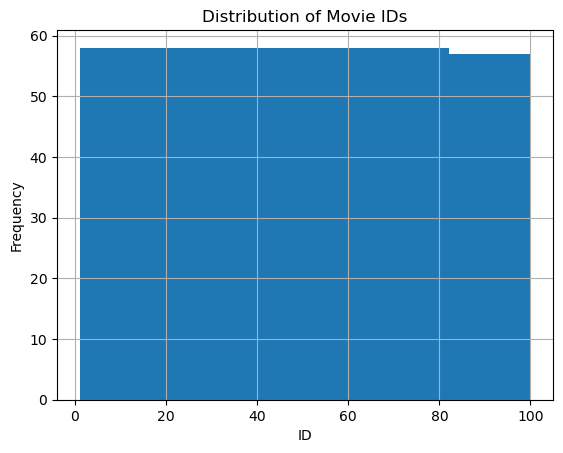

In [126]:
# Visualise the distribution of the movie_info ID

movie_budget['id'].hist(bins=100)

#include titles
plt.title('Distribution of Movie IDs')
plt.xlabel('ID')
plt.ylabel('Frequency')

# show the histogram
plt.show()

In [127]:
#Convert the release date to DateTime Format
movie_budget["release_date"] = pd.to_datetime(movie_budget['release_date'])

movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


In [128]:
#Checking the first 5 rows
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [129]:
#Remove the dollar sign from the numerical columns
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:

    movie_budget[col] = movie_budget[col].replace({'\\$': '', ',': ''}, regex=True).astype(float)

# Display the cleaned data types and head of the dataframe to confirm changes

print(movie_budget[['production_budget', 'domestic_gross', 'worldwide_gross']].head())
#Check first five rows of movie_budget
movie_budget.head()

   production_budget  domestic_gross  worldwide_gross
0        425000000.0     760507625.0     2.776345e+09
1        410600000.0     241063875.0     1.045664e+09
2        350000000.0      42762350.0     1.497624e+08
3        330600000.0     459005868.0     1.403014e+09
4        317000000.0     620181382.0     1.316722e+09


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


##### The movie_budget dataset is now clean and ready for EDA

#### Data information of movie_gross dataset

In [130]:
# Check the statistics of the movie_gross file to know the spread and the distribution of the data
movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


##### Statistical information:
* Domestic gross column has 3359 entries counted.
* The standard deviation of domestic gross for the movies was about 67 million dollars, showing a large spread.
* The 75th percentile of the domestic gross was 2.79 million dollars with the median at 1.2 million dollars. This shows that the 75% of the movies have a domestic gross less than 2.79 million dollars. 25% of the movies have a domestic gross of less than 1.2 million dollars.
* The minimum domestic gross value for the movies was 100 dollars while the maximum domestic gross value stood at 936.7 million dollars.

In [131]:
# Get the dimensions of the DataFrame movie_gross
movie_gross.shape

(3387, 5)

##### movie_gross shape 
* Movie_gross has 3387 rows and 5 columns

In [132]:
# Get a summary of information about the movie_gross data
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


##### Summary of the information in movie_gross
* The data has 3387 rows with title column having no missing values. Title is thus the unique identifier in the dataset.
* Movie_gross has 3 columns with text type of data while the domestic_gross and year columns have floats and integer data types, respectively.

#### Checking Missing Values in the Movie Gross Dataset

In [133]:
# Check missing values
missing_values = movie_gross.isnull().sum()

missing_percentage = (movie_gross.isnull().sum() / len(movie_gross)) * 100

# Create a summary dataframe
missing_summary_gross = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage})


missing_summary_gross

,Missing Values,Percentage Missing
title,0,0.000000
studio,5,0.147623
domestic_gross,28,0.826690
foreign_gross,1350,39.858282
year,0,0.000000


#### Details of missing values in movie gross dataset
* The dataset has missing values primarily in the foreign_gross column, with a smaller number in domestic_gross and studio

#### Cleaning the movie_gross dataset
To clean the data, we will remove rows with missing values in the studio and domestic_gross columns due to their small number, and consider imputing or removing rows with missing foreign_gross values based on their impact on analysis.

In [134]:
# Remove rows with missing values in 'studio' and 'domestic_gross' columns
cleaned_movie_gross = movie_gross.dropna(subset=['studio', 'domestic_gross'])

# Making a copy of the DataFrame
cleaned_movie_gross = movie_gross.dropna(subset=['studio', 'domestic_gross']).copy()

# Fill Missing Values in 'foreign_gross' with 0
cleaned_movie_gross['foreign_gross'] = cleaned_movie_gross['foreign_gross'].fillna(0)

#Checking if there are any Missing Values
cleaned_movie_gross.isna().sum()

#Checking the Data Types of the Movie Gross Dataset
cleaned_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


##### The movie_gross dataset is now clean and ready for EDA

#### The three datasets derived from Movie_gross, Movie_budget and Movie_info are now clean and ready for EDA

### Exploratory Data Analysis (EDA)

In [135]:
#Merging Movie_info Dataset with Movie_budget Dataset
merged_df = pd.merge(updated_df, movie_budget, on='id', how='inner')

#check for any missing values in merged_df
merged_df.isna().sum()

id                   0
synopsis             0
rating               0
director             0
writer               0
theater_date         0
dvd_date             0
runtime              0
genre                0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [136]:
# to get the cleaned datasets
cleaned_movie_gross.to_csv("movie_gross_csv_cleaned", index = True)
updated_df.to_csv("movie_info_cleaned", index = True)
merged_df.to_csv("merged_df_cleaned", index = False)

In [137]:
cleaned_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


<Axes: xlabel='year', ylabel='count'>

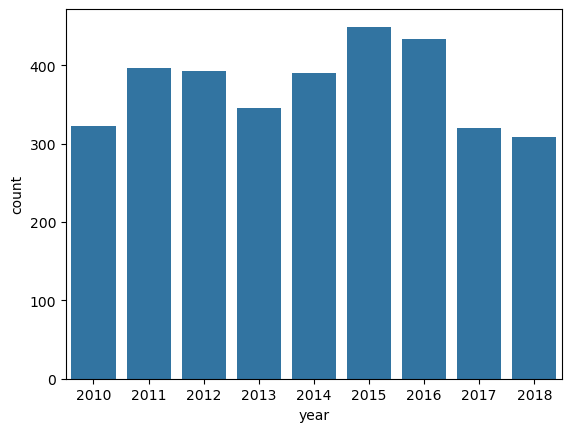

In [138]:
sns.countplot(data=cleaned_movie_gross, x="year")

In [139]:
cleaned_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


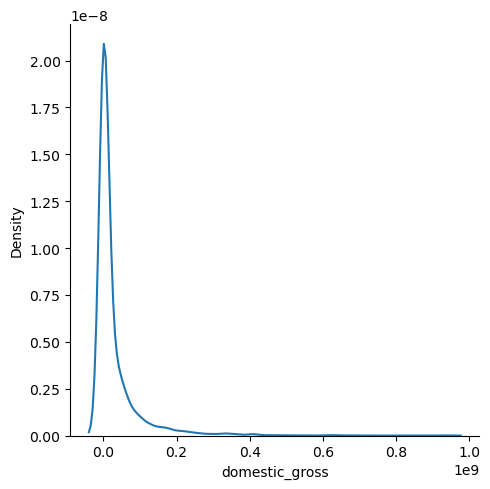

In [140]:
sns.displot(cleaned_movie_gross, x="domestic_gross", kind="kde")

In [141]:
updated_df.head()

,id,synopsis,rating,director,writer,theater_date,dvd_date,runtime,genre
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104.0,Action and Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104.0,Classics
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104.0,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,108.0,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,108.0,Science Fiction and Fantasy


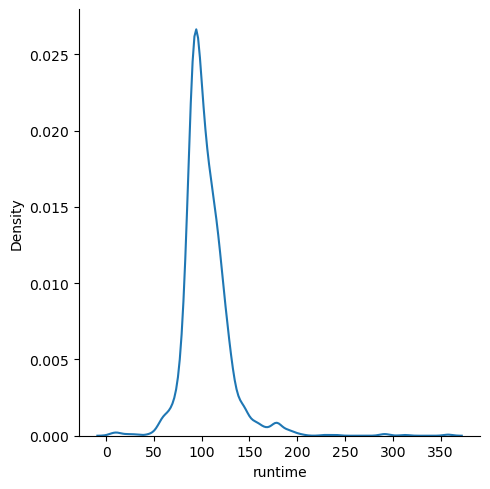

In [142]:
sns.displot(updated_df, x="runtime", kind="kde")

In [143]:
merged_df.head()

,id,synopsis,rating,director,writer,theater_date,dvd_date,runtime,genre,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104.0,Action and Adventure,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104.0,Action and Adventure,2009-05-29,Up,175000000.0,293004164.0,7.314634e+08
2,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104.0,Action and Adventure,2014-03-07,Mr. Peabody & Sherman,145000000.0,111506430.0,2.698064e+08
3,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104.0,Action and Adventure,2010-12-17,How Do You Know?,120000000.0,30212620.0,4.962818e+07
4,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104.0,Action and Adventure,2015-12-11,In the Heart of the Sea,100000000.0,25020758.0,8.969331e+07


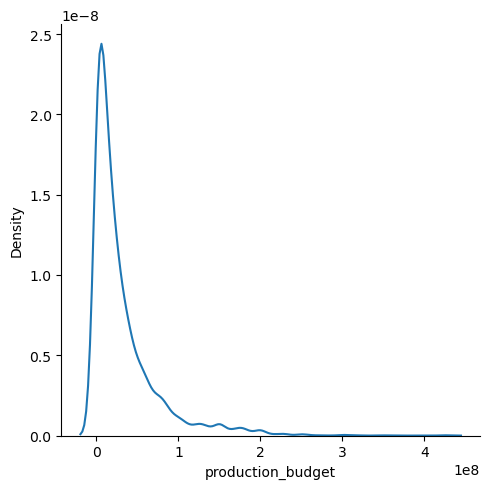

In [144]:
sns.displot(merged_df, x="production_budget", kind="kde")

#### Correlation Analysis

In [145]:
corr_cleaned_movie_gross = cleaned_movie_gross.corr(numeric_only=True)
corr_cleaned_movie_gross


,domestic_gross,year
domestic_gross,1.000000,0.018366
year,0.018366,1.000000


##### Finding
* Correlation between the foreign gross and domestic gross had a strong positive. This implies that an increase in domestic gross could also be reflected with an increase in foreign gross.
* domestic gross and the year has a weak correlation, showing a weak relationship.

#### Conclusion
For predictive modelling, the positive correlation between the domestic gross and foreign gross will be an important relationship to consider.

In [146]:
corr_merged_df = merged_df.corr(numeric_only=True)
corr_merged_df

,id,runtime,production_budget,domestic_gross,worldwide_gross
id,1.000000,-0.045318,-0.033368,-0.007617,-0.026646
runtime,-0.045318,1.000000,0.004013,-0.000906,-0.003864
production_budget,-0.033368,0.004013,1.000000,0.672294,0.739237
domestic_gross,-0.007617,-0.000906,0.672294,1.000000,0.939333
worldwide_gross,-0.026646,-0.003864,0.739237,0.939333,1.000000


#### Finding 
* Production budget has a positive correlation with both domestic gross and worldwide gross, with the later being stronger at 0.7392. This relationship implies that production budgets of movies have a relationship with both domestic and gross earning.
* Runtime has a weak relationship with production budget, domestic and worldwide gross. The correlation between runtime and production budget was 0.0040. Equally, the correlation between runtime with both domestic and worldwide gross was negative at -0.000906 and -0.003864, depicting a very weak relationship.

#### Conclusion
* The relationship between the production budget with both domestic gross and worldwide gross indicates that more production budget was likely to lead to increase in both domestic and worldwide gross revenues for the movies.

In [147]:
cleaned_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


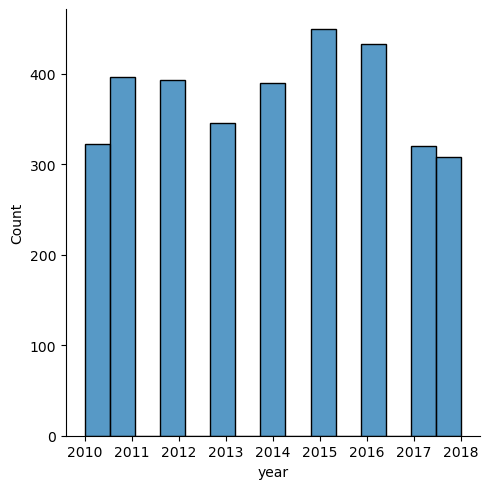

In [148]:
sns.displot(data = cleaned_movie_gross, x="year")